In [4]:
#Preparation
%reload_ext autoreload
%autoreload 2

import os
os.chdir(os.path.expanduser('~/repos/vacancy_analysis'))
#print(os.getcwd())
import vacan.processor.features as ft
import vacan.processor.data_model as dm
from vacan.features_config import FEATURES as ft_config

In [ ]:
#Load raw vacs
dbmanager = dm.DBManager('vacan')
print('Getting raw vacancies...')
raw_vacs = dbmanager.get_raw_vacs()
print('Got {} raw vacancies from db.'.format(len(raw_vacs)))

In [ ]:
#Process vacancies
qualifier = ft.Qualifier(ft_config)
processor = ft.VacancyProcessor(qualifier)
proc_vacs = processor.process(raw_vacs)
print('Got %i processed vacancies.' % len(proc_vacs))

In [63]:
#Save for future
import pickle
with open('proc_vacs.pickle', 'wb') as proc_vacs_file:
    pickle.dump(proc_vacs, proc_vacs_file)

PicklingError: Can't pickle <class 'vacan.processor.features.ProcessedVacancy'>: it's not the same object as vacan.processor.features.ProcessedVacancy

In [7]:
#Load pickle
import pickle
with open('proc_vacs.pickle', 'rb') as proc_vacs_file:
    proc_vacs = pickle.load(proc_vacs_file)

In [39]:
%matplotlib inline
import numpy as np
import pylab as P

def plot_histogram(data, max_el=1000000):
    valid_data = [element for element in data if element is not None and element < max_el]
    n, bins, patches = P.hist(valid_data, 20, normed=1, histtype='stepfilled')
    P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)
    
def plot_boxplots(boxplots, labels):
    P.figure()
    P.hold = True
    P.boxplot(boxplots,vert=0, labels=labels)
    P.show()
    
def get_min_sal(proc_vac):
    return [proc_vac.min_sal for proc_vac in proc_vac if proc_vac.min_sal is not None]

def get_max_sal(proc_vac):
    return [proc_vac.max_sal for proc_vac in proc_vac if proc_vac.max_sal is not None]
    
def compare_sets(subsets):
    """ subsets is dictionary, name: list of proc_vacs. """
    boxplot_data = []
    boxplot_labels = []
    for subset_name, subset_data in subsets.items():
        boxplot_data.extend([get_min_sal(subset_data)])
        boxplot_labels.extend([subset_name+' min'])
    for subset_name, subset_data in subsets.items():
        boxplot_data.extend([get_max_sal(subset_data)])
        boxplot_labels.extend([subset_name+' max'])
    plot_boxplots(boxplot_data, boxplot_labels)

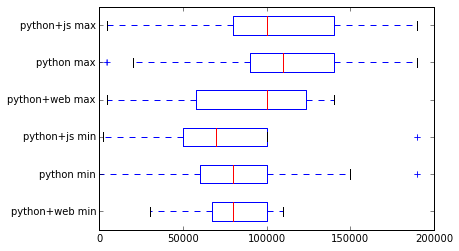

In [42]:
# Plot nice boxplots
stat = ft.Stat(proc_vacs)
compare_sets({'python': stat.subset(['python']),
              'python+js': stat.subset(['python', 'javascript']),
              'python+web': stat.subset(['python', 'web']),
             })